# `numpy` practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

## 1. Exercises 6, 8, 9 and 19

In [2]:
# Ex. 6: Create a null vector of size 10 but the fifth value which is 1
a = np.zeros(10)
a[4] = 1
a

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [3]:
# Ex. 8: Reverse a vector (first element becomes last)
b = np.arange(9)
b = b[::-1]
b

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

In [4]:
# Ex. 9: Create a 3x3 matrix with values ranging from 0 to 8
c = np.arange(9).reshape(3, 3)
c

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [5]:
# Ex. 19: Create a 8x8 matrix and fill it with a checkerboard pattern
d = np.zeros((8, 8))
d[::2, 1::2] = 1
d[1::2, ::2] = 1
d

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

## 2. Exercise 44

In [6]:
# Ex. 44: Consider a random 10 x 2 matrix representing cartesian coordinates, convert them to polar coordinates
cart = np.random.random((10, 2))
pol = np.array((np.sqrt(cart[:, 0]**2+cart[:, 1]**2), np.arctan2(cart[:, 1],cart[:, 0]))).T
print('Cartesian coordinates:\n', cart)
print('Polar coordinates:\n', pol)

Cartesian coordinates:
 [[0.13871678 0.80085226]
 [0.41299659 0.89076633]
 [0.85847833 0.85316901]
 [0.20306602 0.55879449]
 [0.94095381 0.09401188]
 [0.00186185 0.67918266]
 [0.80067298 0.77693762]
 [0.6570552  0.86878914]
 [0.85191916 0.22713057]
 [0.25318068 0.21359076]]
Polar coordinates:
 [[0.81277714 1.39928659]
 [0.98185072 1.13665589]
 [1.21032326 0.7822963 ]
 [0.5945478  1.22223394]
 [0.94563857 0.09958079]
 [0.67918522 1.56805502]
 [1.1156654  0.77035417]
 [1.0892732  0.92328274]
 [0.88167712 0.26054993]
 [0.33124231 0.70078416]]


## 3. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

In [7]:
def snail_curve(a):
    phi = np.linspace(-2*np.pi, 2*np.pi, 201)
    r = a + np.cos(phi)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.figure(figsize=(5,5))
    plt.plot(x, y)

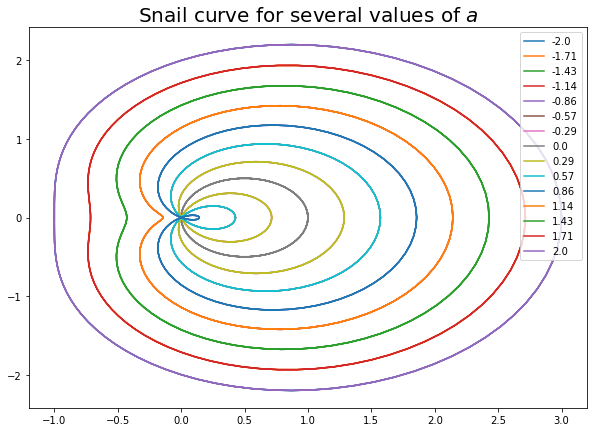

In [8]:
phi = np.linspace(-2*np.pi, 2*np.pi, 201)
a = np.linspace(-2, 2, 15)
phi = phi[phi != 0]
plt.figure(figsize=(10, 7))
for a_k in a:
    r = a_k + np.cos(phi)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y, label = format(round(a_k, 2)))
plt.title("Snail curve for several values of $a$", fontsize=20)
plt.legend()

## 2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

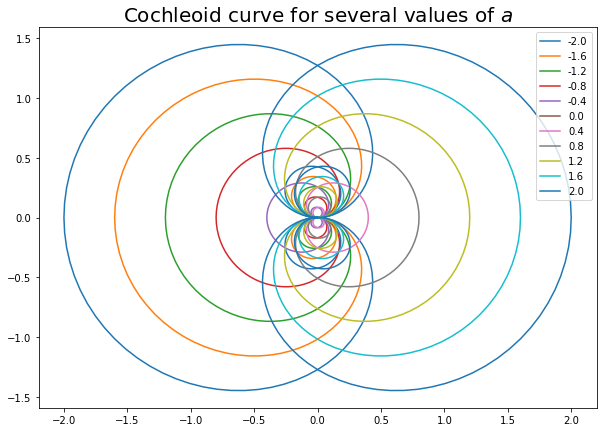

In [9]:
phi = np.linspace(-2*np.pi, 2*np.pi, 201)
a = np.linspace(-2, 2, 11)
phi = np.where(phi != 0, phi, 0) # to work around division by zero
plt.figure(figsize=(10, 7))
for a_k in a:
    r = a_k * np.sin(phi) / phi
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y, label = format(round(a_k, 2)))
plt.title("Cochleoid curve for several values of $a$", fontsize=20)
plt.legend()

## 5. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

In [10]:
# explicit broadcasting
u = np.arange(4)
v = u + 0.5
u = u[:, None]
v = v[None, :]
c = 1./(u - v)
c

array([[-2.        , -0.66666667, -0.4       , -0.28571429],
       [ 2.        , -2.        , -0.66666667, -0.4       ],
       [ 0.66666667,  2.        , -2.        , -0.66666667],
       [ 0.4       ,  0.66666667,  2.        , -2.        ]])

In [11]:
# subtract.outer attribute
u1 = np.arange(4)
v1 = u1 + 0.5
1. / np.subtract.outer(u1, v1)

array([[-2.        , -0.66666667, -0.4       , -0.28571429],
       [ 2.        , -2.        , -0.66666667, -0.4       ],
       [ 0.66666667,  2.        , -2.        , -0.66666667],
       [ 0.4       ,  0.66666667,  2.        , -2.        ]])

## 6. Monte Carlo Error propagation

Part 1

In [12]:
M1_mean = 40e4
M1_std = 500
M2_mean = 30e4
M2_std = 1000
r_mean = 3.2
r_std = 0.01
G = 6.67384e-11
F_mean = G * M1_mean * M2_mean / r_mean**2

F_std = np.sqrt(M1_std**2 * (G * M2_mean / r_mean**2)**2 + M2_std**2 * (G * M1_mean / r_mean**2)**2 + r_std**2 * (-2 * G * M1_mean * M2_mean / r_mean**3)**2)
print('F =', F_mean, '+-', F_std)

F = 0.7820906249999999 +- 0.005625407272639265


In [13]:
np.random.seed(1234)
M1 = np.random.normal(M1_mean, M1_std, size=1000000) # Normal distribution
M2 = np.random.normal(M2_mean, M2_std, size=1000000)
r = np.random.normal(r_mean, r_std, size=1000000)

F = G * M1 * M2 / r**2
print('F =', F.mean(), '+-', F.std())

F = 0.7821118882691668 +- 0.0056331391835191145


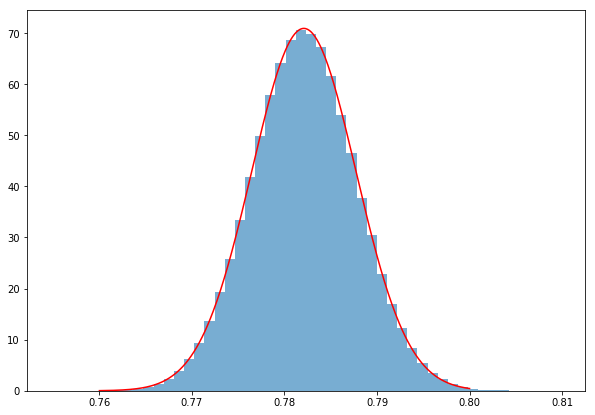

In [14]:
x = np.arange(0.76, 0.8, 0.0001)
fig, axs = plt.subplots(figsize=(10, 7))
axs.hist(F, bins = 50, alpha = 0.6, density = True)
axs.plot(x, norm.pdf(x, F_mean, F_std), c='red')

Part 2

In [15]:
M1_mean = 40e4
M1_std = 2e4
M2_mean = 30e4
M2_std = 1e5
r_mean = 3.2
r_std = 1
G = 6.67384e-11
F_mean = G * M1_mean * M2_mean / r_mean**2

F_std = np.sqrt(M1_std**2 * (G * M2_mean / r_mean**2)**2 + M2_std**2 * (G * M1_mean / r_mean**2)**2 + r_std**2 * (-2 * G * M1_mean * M2_mean / r_mean**3)**2)
print('F =', F_mean, '+-', F_std)

F = 0.7820906249999999 +- 0.5553593043410235


In [16]:
np.random.seed(1234)
M1 = np.random.normal(M1_mean, M1_std, size=1000000) # Normal distribution
M2 = np.random.normal(M2_mean, M2_std, size=1000000)
r = np.random.normal(r_mean, r_std, size=1000000)

F = G * M1 * M2 / r**2
print('F =', F.mean(), '+-', F.std())

F = 159.35756731464411 +- 72852.99726478117


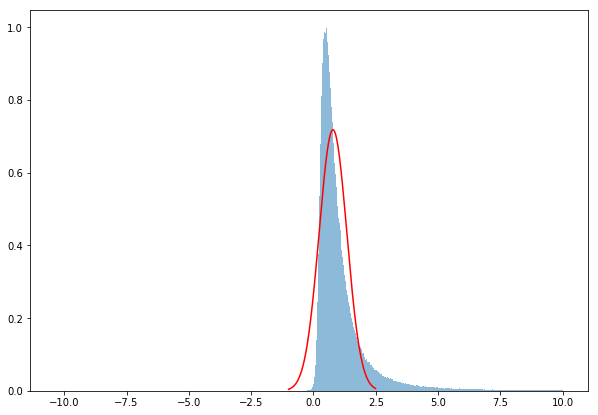

In [17]:
x = np.arange(-1, 2.5, 0.01)
fig, axs = plt.subplots(figsize=(10, 7))
axs.hist(F[F < 10], bins = 1000, alpha = 0.5, density = True)
axs.plot(x, norm.pdf(x, F_mean, F_std), c='red')